# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *R*

**Names:**

* *Raphaël Barman*
* *Raphael Strebel*
* *Thierry Bossy*

---

#### Instructions

*This is a template for part 1 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

In [1]:
# Setup
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
# We disable the mumpy exception messages to have cleaner figures
np.seterr(all='ignore');

---

## 2.1 Exploration of real networks

#### Exercise 2.1

In [53]:
# Graph loading
with open('../data/network1.csv') as f:
    lines = f.readlines()
edges = [line.strip().split(',') for line in lines if not line.startswith('#')]
graph = nx.Graph()
graph.add_edges_from(edges)
print("Number of nodes:", nx.number_of_nodes(graph))
print("Number of edges:", nx.number_of_edges(graph))

Number of nodes: 13033
Number of edges: 18584


#### Exercise 2.2:  Node degree distribution

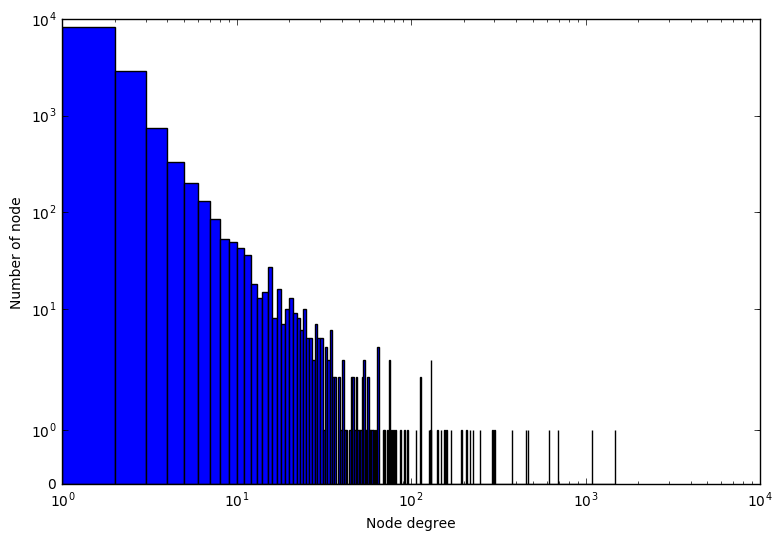

In [54]:
plt.rcParams["figure.figsize"][0] = 9.0
plt.rcParams["figure.figsize"][1] = 6.0
degrees = [x for x in nx.degree(graph).values()]
plt.hist(degrees, bins=np.arange(0,max(degrees)+1,1));
plt.xscale('log') 
plt.yscale('symlog')
plt.xlabel("Node degree")
plt.ylabel("Number of node")
plt.show()

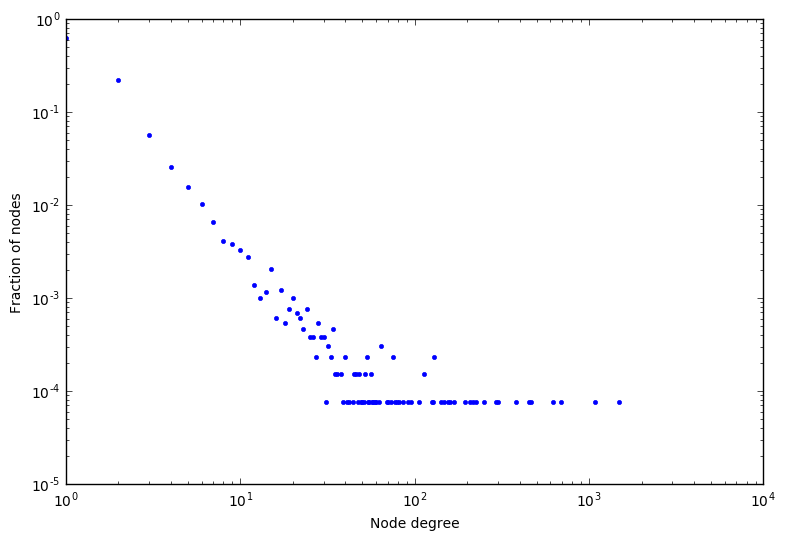

In [16]:
# We make the figure bigger
plt.rcParams["figure.figsize"][0] = 9.0
plt.rcParams["figure.figsize"][1] = 6.0

# node_degree = nx.degree(graph)
# degree_sequence=sorted(nx.degree(graph).values(),reverse=True)
degree_sequence = np.array(nx.degree_histogram(graph))/nx.number_of_nodes(graph)
sequence = np.arange(0,len(degree_sequence),1)

# powerlaw = lambda x, gamma: gamma*np.mean(x)**gamma/x**(gamma+1)
# degree_sequence = [float(x)/nx.number_of_nodes(graph) for x in degree_sequence]
plt.loglog(sequence,degree_sequence,'.')
# plt.loglog(sequence,powerlaw(sequence,0.001))
plt.xlabel("Node degree")
plt.ylabel("Fraction of nodes")
plt.show()

1. Since the data is spread out, a loglog plot seemed the most obvious choice, we did both a histogram plot to see where most of the degrees are and a scatter plot to see the general shape of the distribution.
2. Most of the nodes are of degree ten or less, however there are a few nodes that have very high degrees.
3. It looks like a power law distribution, which is a straight line in a loglog plot.

#### Exercise 2.3: Giant component

In [3]:
print("Number of connected components:", nx.number_connected_components(graph))
giant_component = max(nx.connected_component_subgraphs(graph), key=nx.number_of_nodes)
print("Number of nodes in the biggest connected components:", nx.number_of_nodes(giant_component))
print("Ratio: %.2f"% (nx.number_of_nodes(giant_component)/nx.number_of_nodes(graph)*100), "%")

Number of connected components: 192
Number of nodes in the biggest connected components: 12576
Ratio: 96.49 %


The biggest connected component clearly is a giant component, since it contains more than 95% of the graph.

#### Exercise 2.4: Short paths & Small-worlds

In [10]:
#average (shortest path) length between pair of vertices
print(nx.average_shortest_path_length(giant_component)) # = 4.175488076629283

4.175488076629283


In [4]:
shortest_paths = nx.all_pairs_shortest_path_length(giant_component)

In [6]:
shortest_paths = np.load('shortest_paths.npy').item()

In [7]:
path_list = {}
for node, neighbors in shortest_paths.items():
    for neighbor, distance in neighbors.items():
        if neighbor != node and not (neighbor,node) in path_list:
            path_list[(node,neighbor)] = distance
path_list = list(path_list.values())

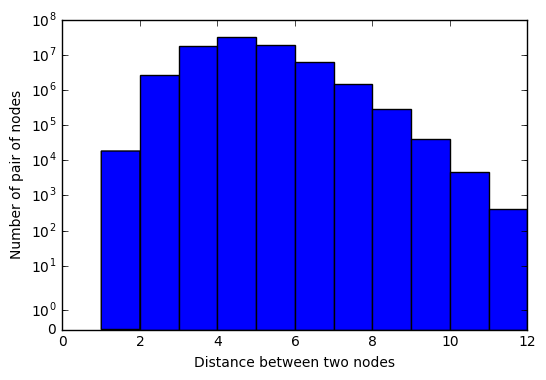

In [8]:
plt.hist(path_list,bins=np.arange(1,13,1))
plt.xlabel("Distance between two nodes")
plt.ylabel("Number of pair of nodes")
plt.yscale('symlog')
plt.show()

In [15]:
def average_nodes_at_dist(shortest_paths, dist):
    res = 0.0
    for neighbors in shortest_paths.values():
        for distance in neighbors.values():
            if(distance <= dist):
                res += 1
    return res/len(shortest_paths)
distance = np.arange(1,13,1)
average_nodes = []
for dist in distance:
    average_nodes.append(average_nodes_at_dist(shortest_paths,dist)/nx.number_of_nodes(graph))

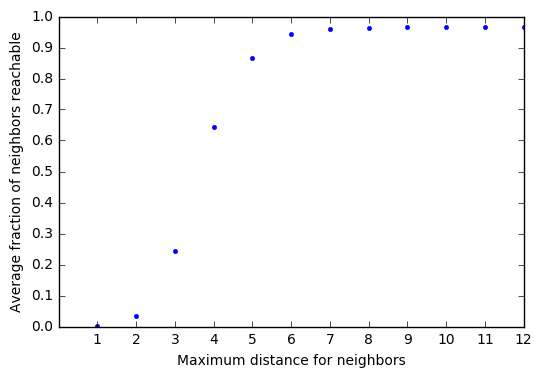

In [36]:
plt.plot(distance,np.vectorize(average_nodes_at_dist)(shortest_paths,distance)/nx.number_of_nodes(graph),'.')
plt.xticks(distance)
plt.yticks(np.arange(0.0,1.1,0.1))
plt.xlabel("Maximum distance for neighbors")
plt.ylabel("Average fraction of neighbors reachable")
plt.show()

We can say that this graph is a small-world.
- The average shortest path is of 4.175.
- From the histogram, we see that most of the distance between two nodes are 6 or less.
- From the last graph, we can see that most of the nodes are reachable with a distance of 6.

#### Exercise 2.5: Network comparison

In [55]:
with open('../data/network2.csv') as f:
    lines2 = f.readlines()
edges = [line.strip().split(',') for line in lines2 if not line.startswith('#')]
graph = nx.Graph()
graph.add_edges_from(edges)

In [56]:
print("Number of nodes:", nx.number_of_nodes(graph))
print("Number of edges:", nx.number_of_edges(graph))

Number of nodes: 26542
Number of edges: 43516


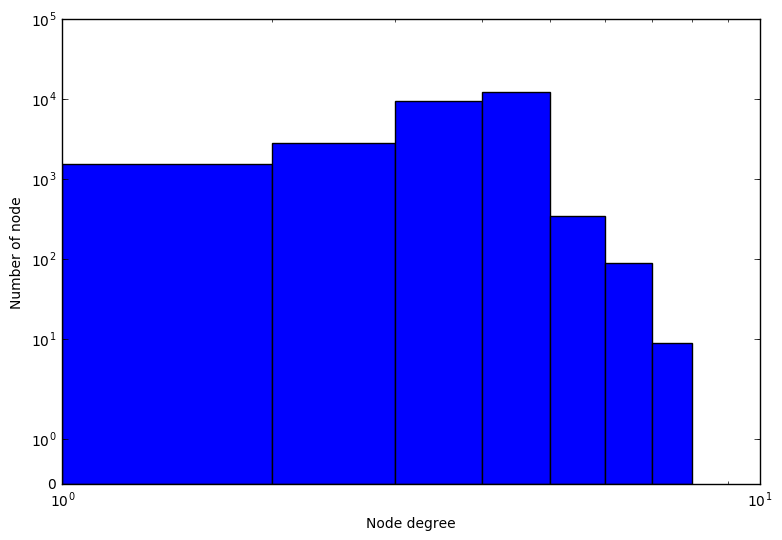

In [57]:
plt.rcParams["figure.figsize"][0] = 9.0
plt.rcParams["figure.figsize"][1] = 6.0
# histogram = nx.degree_histogram(graph)
degrees = [x for x in nx.degree(graph).values()]
plt.hist(degrees, bins=np.arange(0,max(degrees)+1,1));
plt.xscale('log') 
plt.yscale('symlog')
plt.xlabel("Node degree")
plt.ylabel("Number of node")
plt.show()

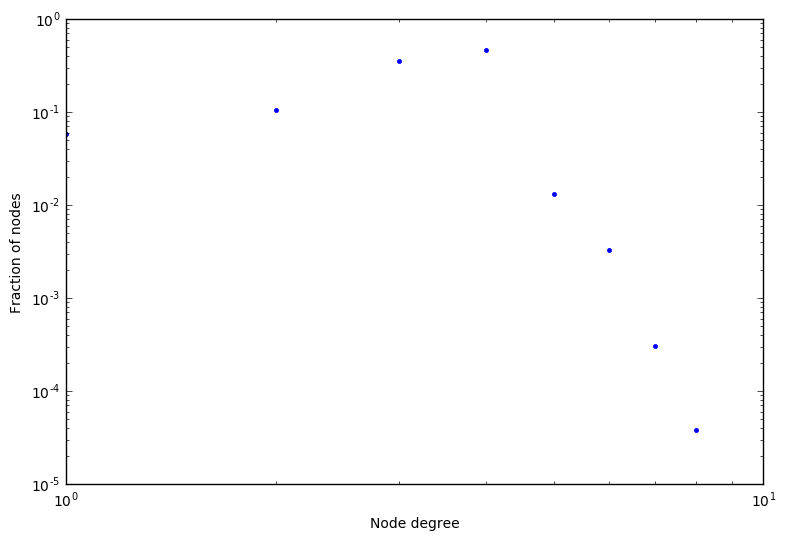

In [50]:
# We make the figure bigger
plt.rcParams["figure.figsize"][0] = 9.0
plt.rcParams["figure.figsize"][1] = 6.0

# node_degree = nx.degree(graph)
# degree_sequence=sorted(nx.degree(graph).values(),reverse=True)
degree_sequence = np.array(nx.degree_histogram(graph))/nx.number_of_nodes(graph)
sequence = np.arange(0,len(degree_sequence),1)

# powerlaw = lambda x, gamma: gamma*np.mean(x)**gamma/x**(gamma+1)
# degree_sequence = [float(x)/nx.number_of_nodes(graph) for x in degree_sequence]
plt.loglog(sequence,degree_sequence,'.')
# plt.loglog(sequence,powerlaw(sequence,0.001))
plt.xlabel("Node degree")
plt.ylabel("Fraction of nodes")
plt.show()

In [36]:
print("Number of connected components:", nx.number_connected_components(graph))
giant_component = max(nx.connected_component_subgraphs(graph), key=nx.number_of_nodes)
print("Number of nodes of the biggest connected components:", nx.number_of_nodes(giant_component))
print("Ratio: %.2f"% (nx.number_of_nodes(giant_component)/nx.number_of_nodes(graph)*100), "%")

Number of connected components: 5
Number of nodes of the biggest connected components: 26481
Ratio: 99.77 %


We can see that there is one giant component that includes almost all the network (except for 4 small connected components) whereas the first network had a greater amount of smaller connected components.

In [37]:
print(nx.average_shortest_path_length(giant_component))

97.55708682597601


In [38]:
shortest_paths = nx.all_pairs_shortest_path_length(giant_component)

KeyboardInterrupt: 

In [39]:
path_list = {}
for node, neighbors in shortest_paths.items():
    for neighbor, distance in neighbors.items():
        if neighbor != node and not (neighbor,node) in path_list:
            path_list[(node,neighbor)] = distance
path_list = list(path_list.values())

NameError: name 'shortest_paths' is not defined

In [ ]:
plt.hist(path_list,bins=np.arange(1,13,1))
plt.xlabel("Distance between two nodes")
plt.ylabel("Number of pair of nodes")
plt.yscale('symlog')
plt.show()

In [ ]:
def average_nodes_at_dist(shortest_paths, dist):
    res = 0.0
    for neighbors in shortest_paths.values():
        for distance in neighbors.values():
            if(distance <= dist):
                res += 1
    return res/len(shortest_paths)
distance = np.arange(1,13,1)
average_nodes = []
for dist in distance:
    average_nodes.append(average_nodes_at_dist(shortest_paths,dist)/nx.number_of_nodes(graph))

In [ ]:
plt.plot(distance,np.vectorize(average_nodes_at_dist)(shortest_paths,distance)/nx.number_of_nodes(graph),'.')
plt.xticks(distance)
plt.yticks(np.arange(0.0,1.1,0.1))
plt.xlabel("Maximum distance for neighbors")
plt.ylabel("Average fraction of neighbors reachable")
plt.show()

#### Exercise 2.6: Network identification

Wild guess : The first is the subgraph of routers comprising the Internet because ...
The second is the road network of New York because all roads are connected (except for rare exceptions).